In [179]:
%load_ext autoreload
%autoreload 2

import os

SEED = 42

head, tail = os.path.split(os.getcwd())
if tail == "notebooks": os.chdir(head)

import src.plots as plots
import src.tools as tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


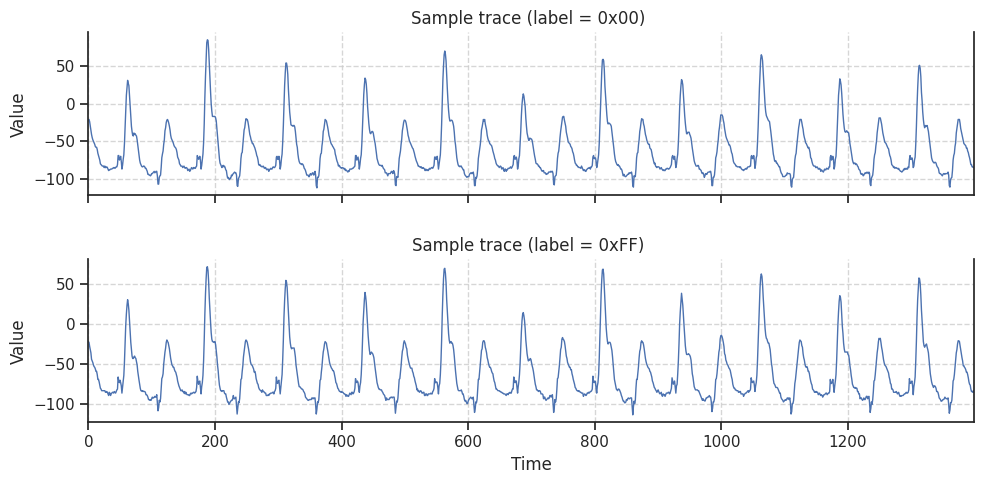

In [4]:
import matplotlib.pyplot as plt

X, y = tools.load_data("data/raw/v1_var_desync0.h5")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

plots.plot_sample(X, y, byte_value=0x00, ax=ax1, seed=SEED)
plots.plot_sample(X, y, byte_value=0xFF, ax=ax2, seed=SEED)

fig.tight_layout(h_pad=2)
fig.savefig("figures/sample_traces.png", dpi=300)

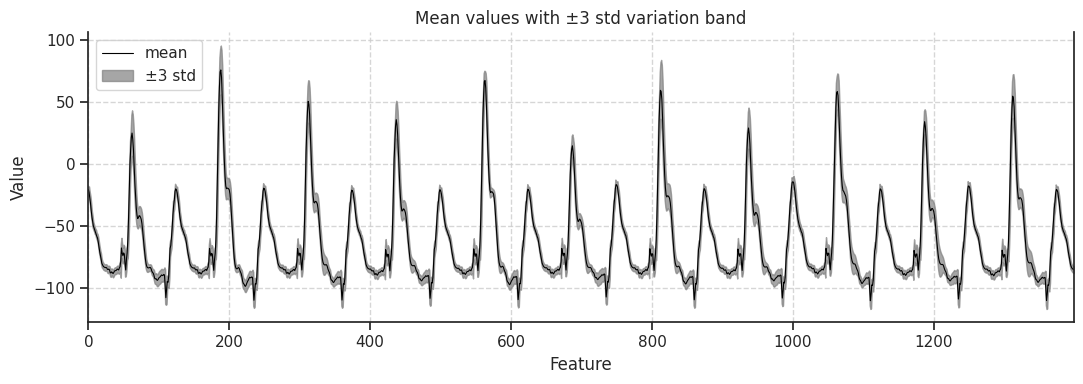

In [5]:
fig = plots.plot_mean(X, sd=3)
fig.savefig("figures/mean_trace.png", dpi=300)

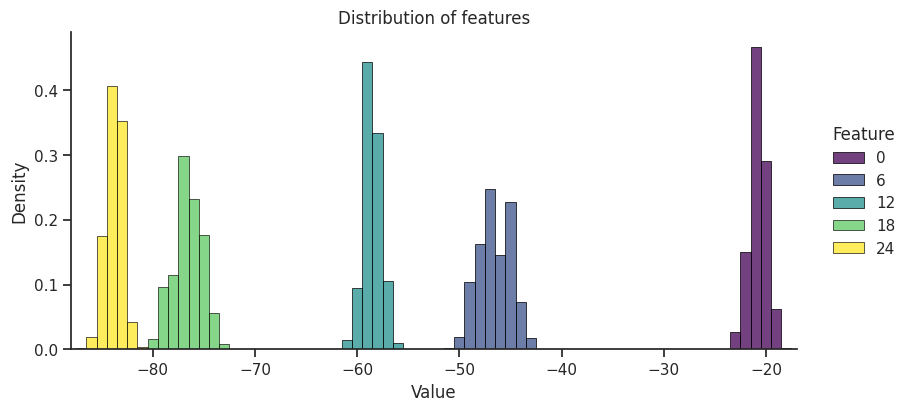

In [181]:
ax = plots.features_hist(X, idx=range(0, 30, 6), figsize=(9, 4))
ax.figure.savefig("figures/feature_hist.png", dpi=300)

Niestety ciężko wykonać jakikolwiek test normalności dla tak dużego N, jako że dodatkowo dane są skwantyzowane. Sprawdzę, jak wygląda rozkład skosu i kurtozy, i czy są wystarczające żeby uznać rozkład w przybliżeniu za normalny.

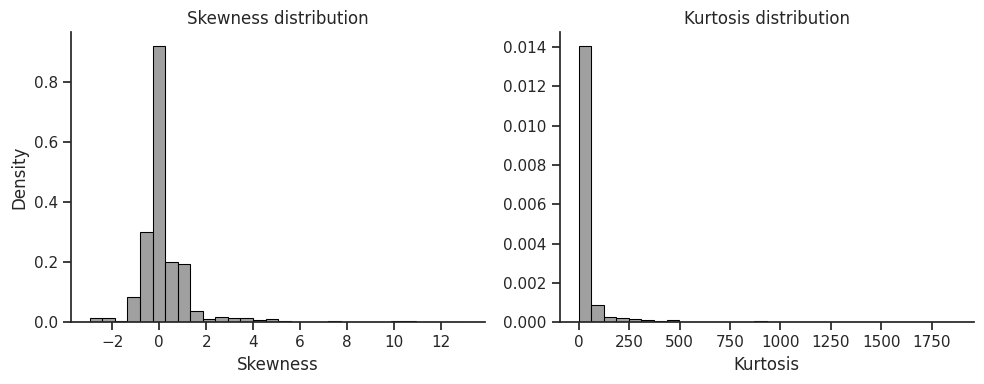

In [7]:
fig = plots.dist_plots(X)
fig.savefig("figures/feature_dist.png", dpi=300)

Skos i kurtoza gromadzą się wokół zera, czyli tak jak powinno być dla rozkładu normalnego.

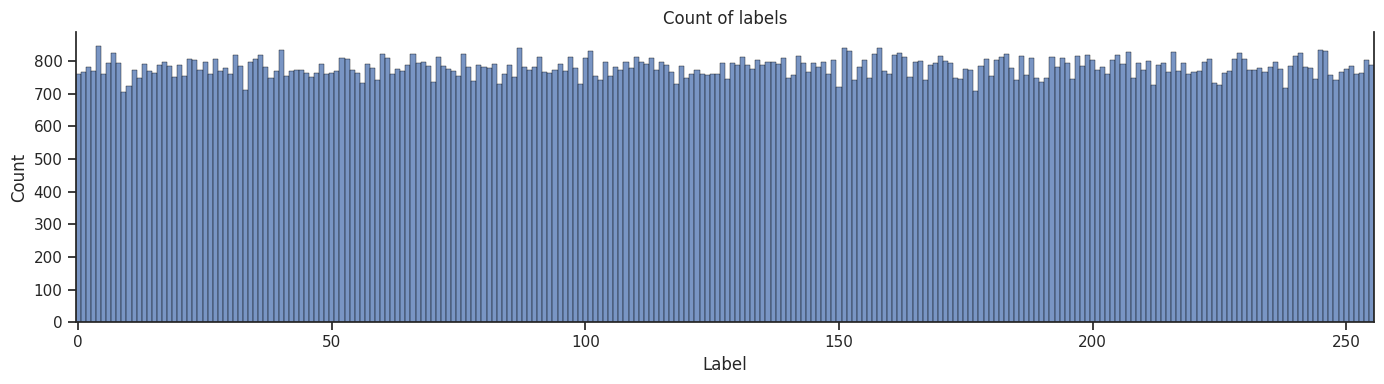

In [182]:
fig = plots.class_hist(y)
fig.savefig("figures/class_hist.png", dpi=300)

Klasy są zbalansowane

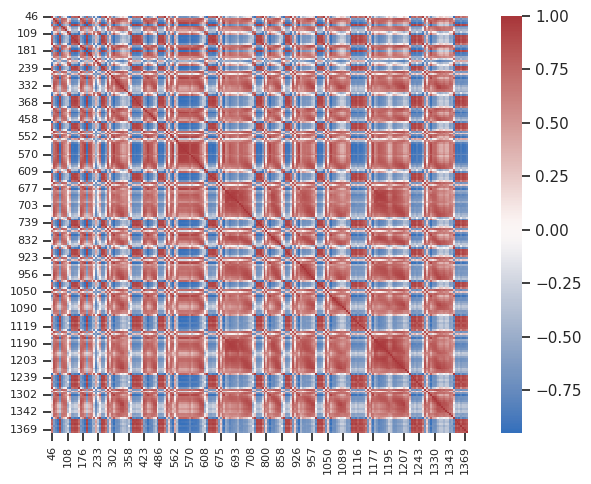

In [9]:
fig = plots.feature_pearson(X, figsize=(7, 5))
fig.savefig("figures/feature_pearson.png", dpi=300)

Widać ładnie, że cechy znajdujące się w podobnym momencie cyklu procesora są ze sobą silnie skorelowane.